<a href="https://colab.research.google.com/github/LeeEdzl/Colabwork/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**과제 1.**

타이타닉 데이터 세트를 이용하여
* SGD분류,
* 결정트리,
* 랜덤포래스트,
* 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화.

---

기본값으로 모델을 생성하고, 최적화를 진행할 것.

* random_state는 자신의 학번으로 설정.

입력 데이터도 적절히 수정할 것.

* NaN(Not A Number) 값을 어떻게 처리했는가?

* 왜 이렇게 훈련 및 테스트 세트를 만들었는가?

수행한 최적화 방법을 단계별로 자세히 설명할 것.

* 왜 이런 파리미터를 수정하는가?

* 왜 이렇게 파라미터 범위를 정했는가?

* 왜 이런 파라미터를 최종적으로 선택했는가?

위에 언급한 것 말고도 다양한 방법을 사용해 볼 것.

모델을 만들고 난 후에도 필요하면 입력 데이터를 수정하여 다시 모델을 만들 수 있음.

* 특성 공학 이용
---

**주의!!!**

다운받은 파일 수정 금지 및 모든 데이터 사용할 것.

그러나 변수로 지정된 데이터는 수정가능.

파일 /content/drive/MyDrive/Colab Notebooks/에 업로드하여 사용할 것.

* 예) titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

random_state는 자신의 학번으로 설정.

10/15일까지 자신의 GitHub에 업로드할 것.

---

타이타닉 데이터 세트 (이진분류)

https://www.kaggle.com/competitions/titanic/data

<br>

**데이터 전처리**


In [144]:
#데이터 불러오기
import pandas as pd

titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

In [145]:
titanic

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [146]:
test #테스트 세트

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [148]:
train #훈련 세트

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


titanic 데이터는 train 데이터의 생존여부를 나타내는 데이터.<br>
모델을 훈련할 때 train 데이터 내에 타깃 데이터를 지정해야 하는데, 타깃 데이터를 titanic 데이터로 사용해도 될 것 같음.<br> train 데이터를 가지고 모델을 만들고 test 데이터를 가지고 생존여부를 예측하는 것이기에 test 데이터에는 survived 가 없는 걸 알수 있음.

> 각 변수들의 의미를 파악해보면,<p>
PassengerId : 승객 고유번호 <br>
Survived : 생존 여부 (1=생존, 0=사망)<br>
Pclass : 객실 등급 (1=Upper, 2=Middle, 3=Lower)<br>
Name : 이름<br>
Sex : 성별<br>
Age : 나이<br>
SibSp : 동반 형제, 자매와 배우자의 수<br>
Parch : 동반 부모와 자식의 수<br>
Ticket : 티켓 고유번호<br>
Fare : 티켓 요금<br>
Cabin : 객실 번호<br>
Embarked : 승선 항구 (C=Cherbourg, Q=Queenstown, S=Southampthon)<p>
여기서 사용할 변수는 Survived, Pclass, Sex, Age, Embarked 이다.

In [150]:
#사용하지 않는 열 삭제하기

train = train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
train

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


In [151]:
#테스트 세트에도 똑같이 적용하기
test = test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
test

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S
...,...,...,...,...
413,3,male,NaN,S
414,1,female,39.0,C
415,3,male,38.5,S
416,3,male,NaN,S


In [152]:
#결측치 제거하기

#1. Age가 NaN인 값 찾기
train[train.Age.isna()]

#총 177개의 행의 Age가 NaN인 것을 알 수 있음.
#NaN인 행을 삭제하는 것이 가장 간편하지만, 데이터가 부족할수도 있기 때문에 이를 Age의 평균값으로 대체하고자 함.

,Survived,Pclass,Sex,Age,Embarked
5,0,3,male,NaN,Q
17,1,2,male,NaN,S
19,1,3,female,NaN,C
26,0,3,male,NaN,C
28,1,3,female,NaN,Q
...,...,...,...,...,...
859,0,3,male,NaN,C
863,0,3,female,NaN,S
868,0,3,male,NaN,S
878,0,3,male,NaN,S


In [153]:
#Age의 평균 구하기
mean_age = train["Age"].mean()

#Age의 평균으로 결측치 제거하기 (훈련 세트와 테스트 세트의 일관성을 위해 훈련 세트의 age 평균 값으로 테스트 세트의 결측치를 제거)
train["Age"].fillna(mean_age, inplace=True)
test["Age"].fillna(mean_age, inplace=True)

In [154]:
#결측치가 제거되었는지 확인하기
train[train.Age.isna()]

#결측치가 제대로 제거되었음을 확인할 수 있음.

,Survived,Pclass,Sex,Age,Embarked


In [155]:
#소수점 둘째자리까지만 출력되게 하기
train["Age"] = train["Age"].round(2)
test["Age"] = test["Age"].round(2)

In [156]:
#2. Embarked가 NaN인 값 찾기
train[train.Embarked.isna()]

,Survived,Pclass,Sex,Age,Embarked
61,1,1,female,38.0,NaN
829,1,1,female,62.0,NaN


In [157]:
#Embarked가 NaN인 행 삭제하기.(따로 대체할 수 있는 값이 없기 때문에 삭제)
train.drop([61, 829], axis=0, inplace=True)

In [158]:
train[train.Embarked.isna()]

#Embarked의 결측치가 제대로 삭제된 것을 확인할 수 있음.

,Survived,Pclass,Sex,Age,Embarked


In [159]:
#범주형 데이터 처리하기
#모델은 범주형 데이터를 이해하지 못하기에 숫자형 데이터로 변환해줘야 함.

#1.Sex
train['Sex'].value_counts()

#Sex의 범주는 male과 female 두개 뿐인 것을 확인할 수 있음.

male      577
female    312
Name: Sex, dtype: int64

In [160]:
#female=1. male=0으로 지정해주면서 범주형 데이터를 숫자형 데이터로 변환해주기
train["Sex"] = (train["Sex"] == "female").astype(int)
test["Sex"] = (test["Sex"] == "female").astype(int)

In [161]:
#변경된 데이터 확인하기
train

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,S
1,1,1,1,38.0,C
2,1,3,1,26.0,S
3,1,1,1,35.0,S
4,0,3,0,35.0,S
...,...,...,...,...,...
886,0,2,0,27.0,S
887,1,1,1,19.0,S
888,0,3,1,29.7,S
889,1,1,0,26.0,C


In [162]:
#2.Embarked
#해당 부분에서 Embarked를 원-핫 인코딩을 사용해 숫자형 변수로 변경해주는 것을 생각했는데, 모델이 학습할 때 embarked가 꼭 필요한 변수가 아니라고 생각되어 열을 삭제함.
train = train.drop(['Embarked'], axis=1)
test = test.drop(['Embarked'], axis=1)

In [163]:
train

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
886,0,2,0,27.0
887,1,1,1,19.0
888,0,3,1,29.7
889,1,1,0,26.0


<br>
모델을 만들기에 앞서 훈련 세트와 테스트 세트로 나눠줘야 하는데,
train 데이터를 가지고 모델을 만든 다음 마지막에 test 데이터를 가지고 예측을 해보려고 함.

In [164]:
import numpy as np
from sklearn.model_selection import train_test_split

data = train[['Pclass', 'Sex', 'Age']].to_numpy()
target = train['Survived'].to_numpy()

#훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=202139827)

In [176]:
#데이터 표준화하기 (여기서 표준화 해야할 데이터는 숫자형 데이터인 'Age'만 표준화 하면 됨.)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data[['Age']] = ss.fit_transform(data[['Age']])

**SGD분류**

In [204]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_input, train_target)

print(sc.score(train_input, train_target))
print(sc.score(test_input, test_target))

0.6835443037974683
0.7303370786516854


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


**결정트리**

In [183]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202139827)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

#테스트 세트와 훈련 세트의 정확도가 높게 나오지는 않음. ()

0.7735583684950773
0.7191011235955056


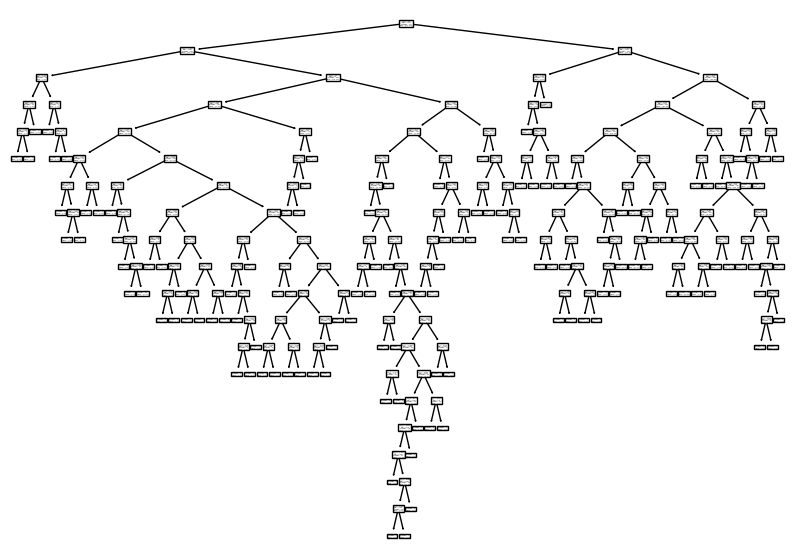

In [184]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

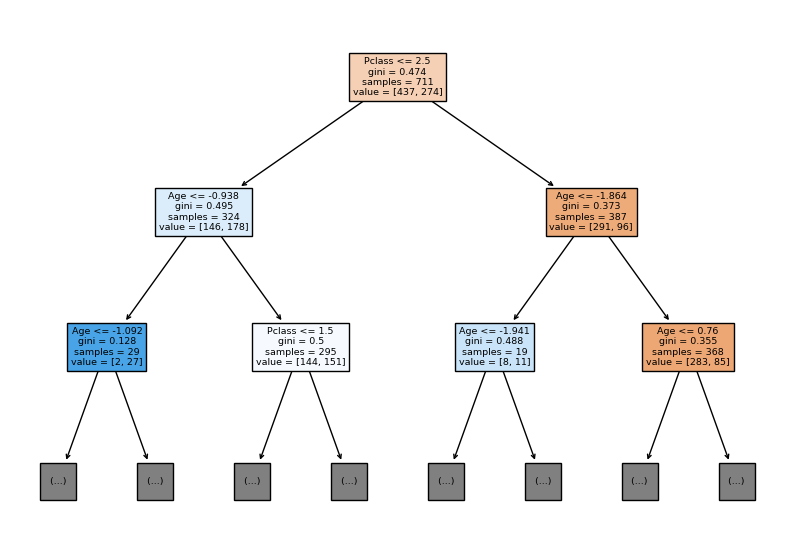

In [199]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['Pclass', 'Sex', 'Age']) #max_depth 조절해서 과대 및 과소 적합을 보정해보기
plt.show()

In [202]:
#test.csv 데이터로 예측하기
test_predict = dt.predict(test)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

**랜덤포레스트**

In [203]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

#cross_validate()함수를 이용해 교차 검증 수행함,
rf = RandomForestClassifier(n_jobs=-1, random_state=202139827)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#훈련 세트에 대한 결과값도 같이 반환함으로 과대, 과소 적합 여부 판단하기

0.7798862595608803 0.6638333497488427


**히스토그램기반 그래디언트 부스팅**

In [205]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202139827)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.7496410802247582 0.6581798483206933


In [206]:
from sklearn.inspection import permutation_importance #그레디언트 부스팅보다 높은 성능을 제공함

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.12925457 0.         0.10421941]


In [207]:
#테스트 세트에서 특성 중요도 출력하기
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.0994382  0.         0.04213483]


In [208]:
hgb.score(test_input, test_target)

0.702247191011236